<a href="https://colab.research.google.com/github/guimarczewski/From-Data-to-Insights-with-Google-Cloud/blob/main/2_Explore_and_Create_an_Ecommerce_Analytics_Pipeline_with_Cloud_Dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explore and Create an Ecommerce Analytics Pipeline with Cloud Dataprep

O Cloud Dataprep da Trifacta é um serviço de dados inteligente para explorar visualmente, limpar e preparar dados estruturados e não estruturados para análise. Neste laboratório, exploraremos a IU do Cloud Dataprep para criar um pipeline de transformação de comércio eletrônico que será executado em um intervalo programado e retornará os resultados ao BigQuery.

Embora este laboratório seja amplamente focado no Cloud Dataprep, você precisa do BigQuery como um endpoint para ingestão de conjunto de dados no pipeline e como destino para a saída quando o pipeline for concluído.

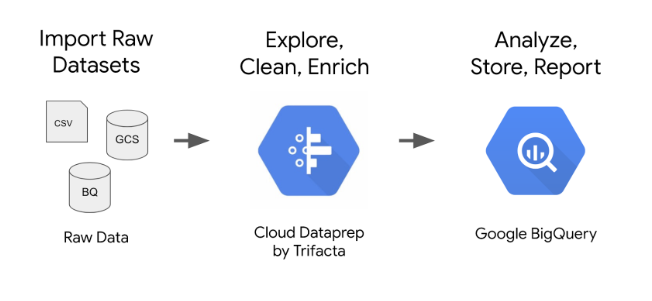

##Criando um conjunto de dados

Antes de iniciarmos a transformação de dados, precisamos criar um conjunto de dados no BigQuery, para receber esses dados.

O dataset ID será "ecommerce", e executaremos o seguinte comando para criação da tabela:

In [ ]:
%%sql
#standardSQL
 CREATE OR REPLACE TABLE ecommerce.all_sessions_raw_dataprep
 OPTIONS(
   description="Raw data from analyst team to ingest into Cloud Dataprep"
 ) AS
 SELECT * FROM `data-to-insights.ecommerce.all_sessions_raw`
 WHERE date = '20170801'; # limiting to one day of data 56k rows for this lab

Essa consulta copia um subconjunto do conjunto de dados brutos de comércio eletrônico público para seu próprio conjunto de dados do projeto para você explorar e limpar no Cloud Dataprep

## Conectando os dados do BigQuery ao Cloud Dataprep

O nome do nosso flow será "Ecommerce Analytics Pipeline", e sua descrição será "Revenue reporting table for Apparel". Após a criação, iremos adicionar o nosso dataset "ecommerce.all_sessions_raw_dataprep".

Com a tabela conectada, podemos explorar nossos dados clicando em "Edit Recipe".

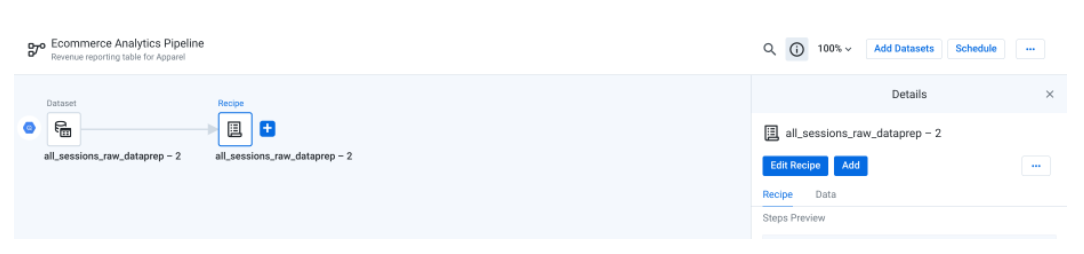

Após alguns minutos, são exibidos os resumos das colunas, como a distribuição dos dados e o tipo de dado da coluna, e da tabela, como o número de coluna e de linhas.

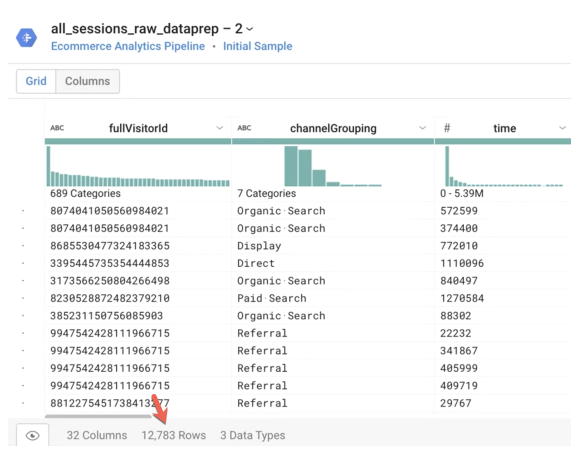

Colocando o cursor sobre o mini gráfico na parte superior das colunas, podemos verificar os valores em maior e menor quantidade. Na coluna "channelGrouping", por exemplo, o valor mais encontrado é o "Referral", presente em mais de 5.000 linhas:

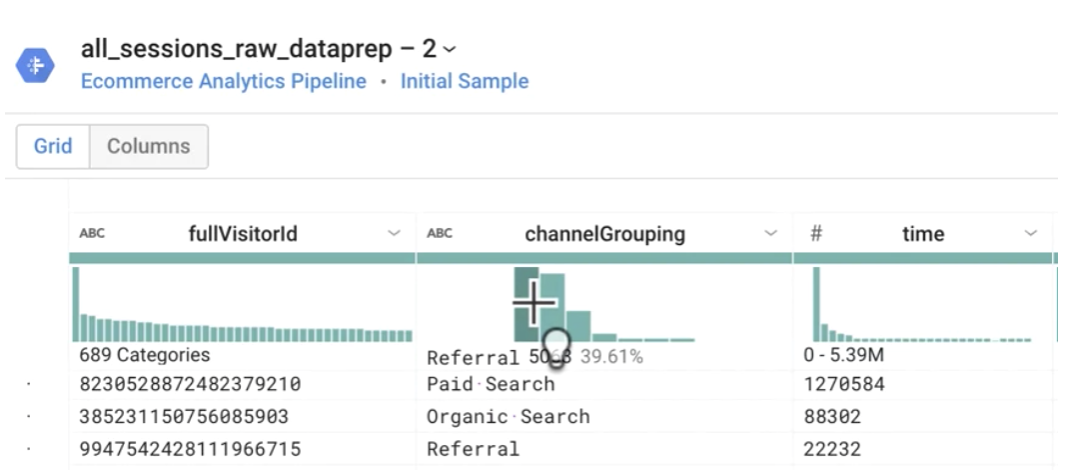

Também podemos identificar facilmente a quantidade de linhas com valor nulo, checando apenas a linha logo abaixo do nome da coluna:

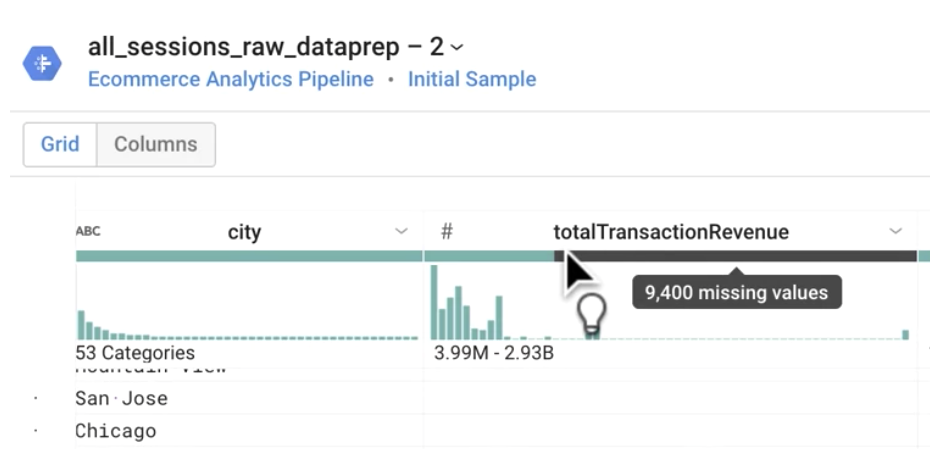

Nesse caso a coluna "totalTransactionRevenue" contém 9.400 linhas nulas.

A mesma linha que exibe a quantidade de valores nulos, também exibe a quantidade de linhas com valores incompatíveis com o tipo de coluna. 
O Google Dataprep identificou a coluna "productSKU" como do tipo inteiro, porém existem letras em algumas linhas:


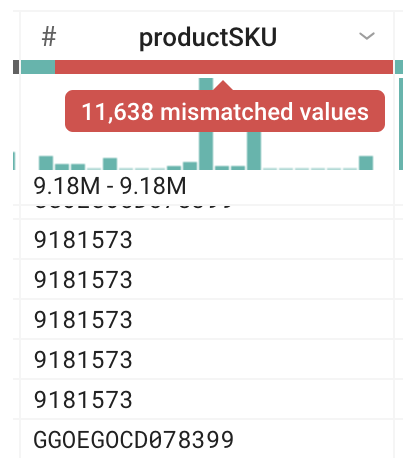

Para alterar o tipo da coluna, basta selecionar as opções da mesma e alterar o tipo para "string". 

Para informações mais detalhadas sobre a coluna, como a média, mediana e valores máximos e mínimos, basta selecionar os detalhes da coluna, clicando na seta ao lado do nome da mesma.

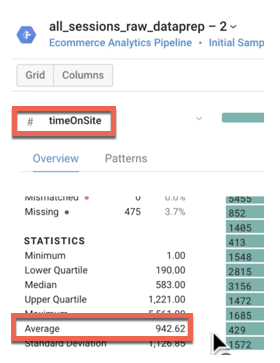

##Limpando os dados

Nesse passo, iremos limpar os dados excluindo colunas não utilizadas, eliminando duplicatas, criando campos calculados e filtrando as linhas. A exclusão de colunas é comum quando os campos são depreciados no esquema ou têm todos os valores NULL.



Ao exibir as opções da tabela, vemos que já existem diversas opções com fácil acesso, como filtrar linhas, substituir valores, group by e deletar a coluna selecionada ou deletar todas as outras e manter somente ela.

Por primeiro, iremos deletar a coluna itemQuantity, pois possui somente valores nulos:

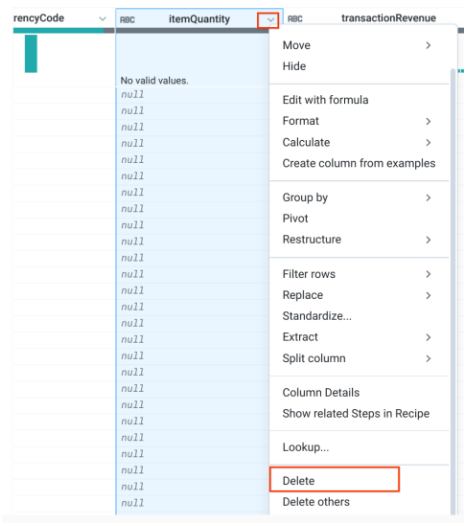

Identificamos que no conjunto de dados que existem linhas duplicadas, então iremos remover essas linhas acessando Recipe > New Step > Remove duplicate rows.

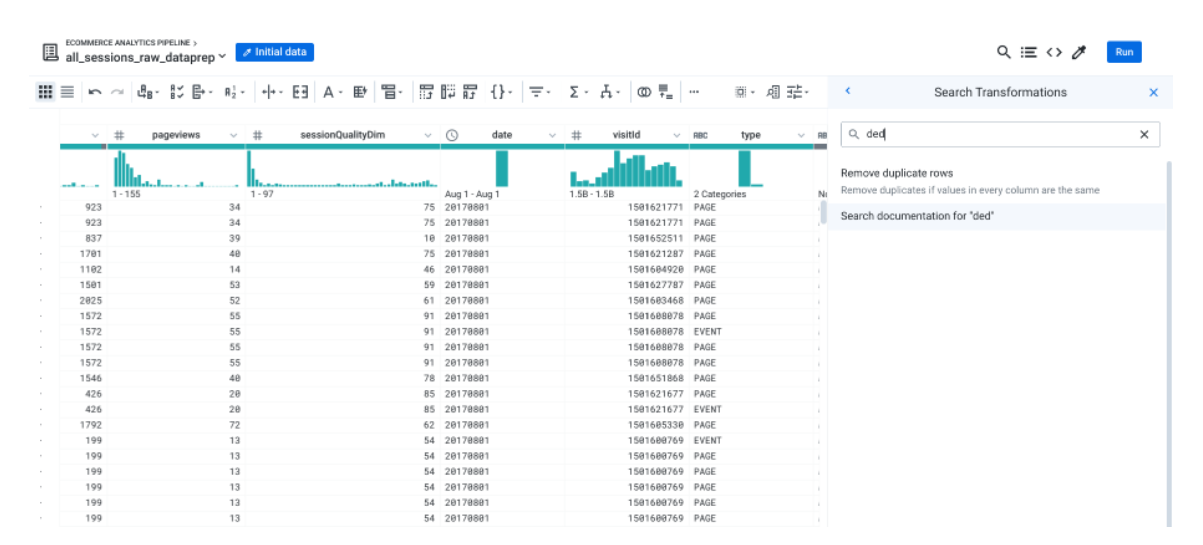

Após remover as linhas duplicadas, iremos filtrar as sessões sem receita. Para isso basta selecionarmos a barra de valores ausentes da coluna totalTransactionRevenue. No painel de sugestões, basta clicar em excluir linhas com valores ausentes e adicionar. 

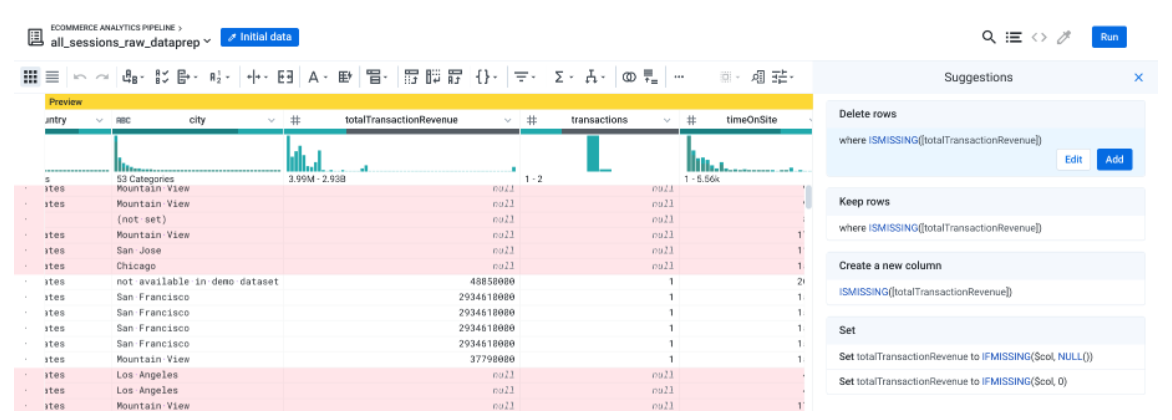

Agora filtraremos a coluna type, clicando em cima da coluna e nas sugestões selecionaremos para manter apenas as linhas com o tipo igual a "page".

Na coluna v2ProductCategory vamos manter apenas as transações da categoria "vestuário", exibindo o menu suspenso da coluna e selecionando a opção de filtrar linhas.


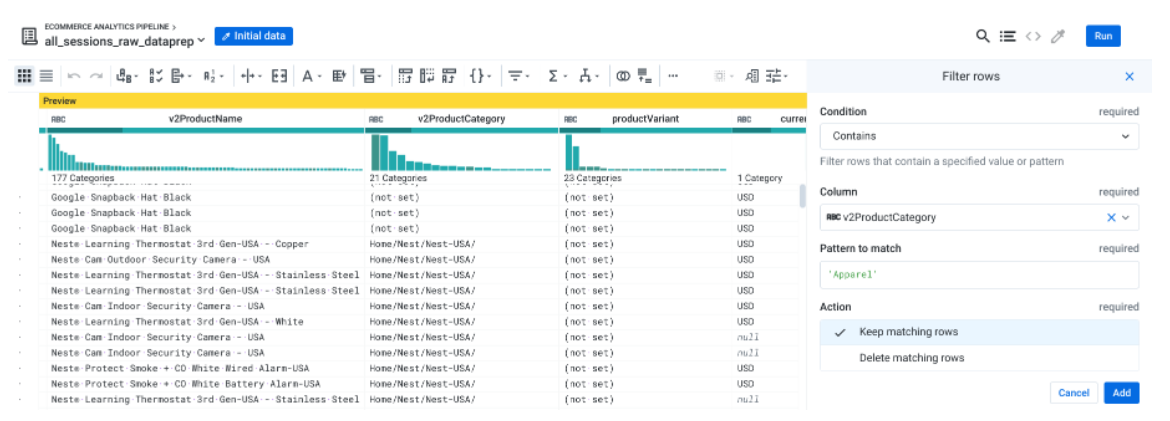

##Enriquecendo os dados

Verificando as informações dos campos [aqui](https://support.google.com/analytics/answer/3437719?hl=en), identificamos que não existe um campo de ID único, mas podemos criá-lo combinando os dados da coluna fullVisitorId e visitId.

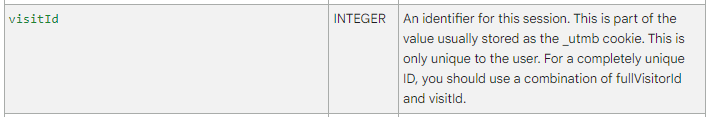

Para criarmos esse novo campo, basta clicar em nova etapa e selecionar o passo "merge columns", escolhendo as duas colunas desejadas e nomeando a coluna como "unique_session_id" e a adicionando.

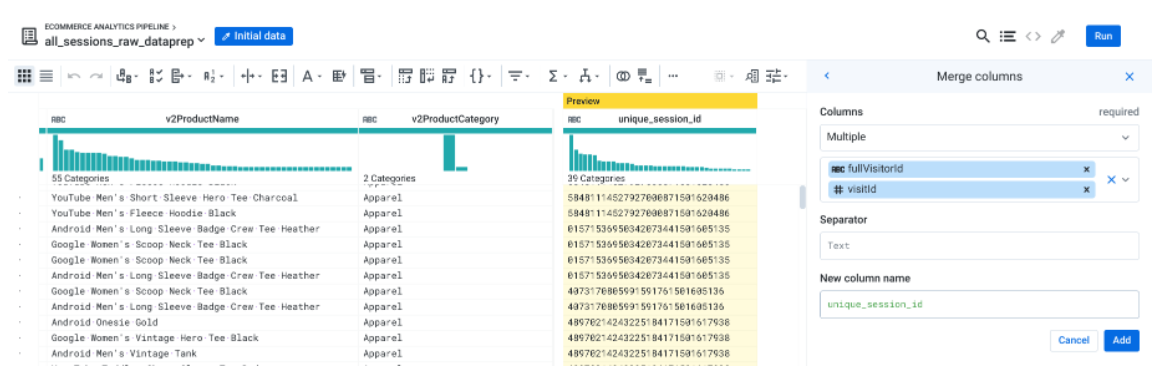

###Criando uma declaração de caso para o tipo de ação ded comércio eletrônico

O campo eCommerceAction_type é um número inteiro que mapeia o tipo de ação do cliente, de acordo com a seguinte tabela:

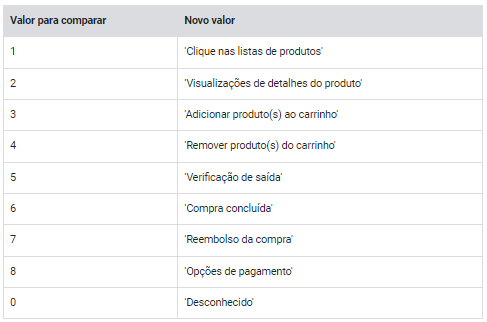

Para criarmos essa nova coluna, no menu de transformações basta selecionar a opção "Conditional Column" e adicionar os valores iniciais e os valores correspondentes. O nome dessa nova coluna será "eCommerceAction_label".

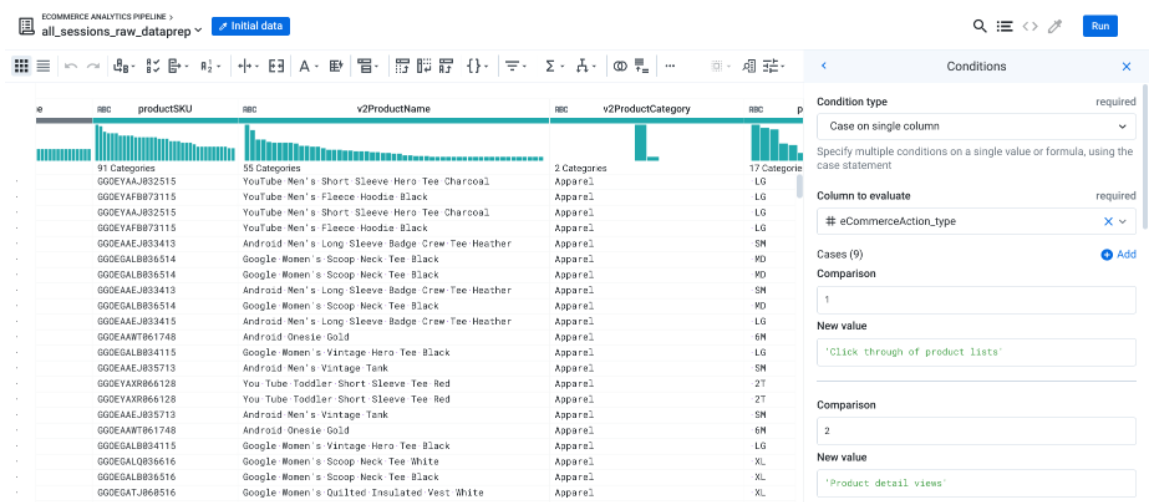

Podemos verificar todo o passo a passo realizado até agora em "recipe":

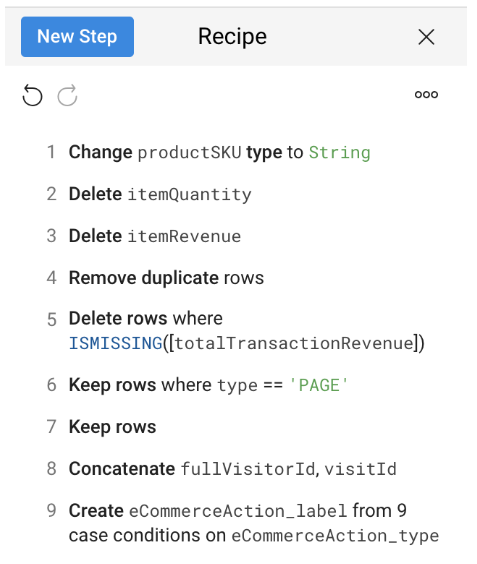

##Executando o job do Cloud Dataprep para carregar o BigQuery

Quando estiver satisfeito com o fluxo, é hora de executar a receita de transformação em seu conjunto de dados de origem. Para fazer isso, você executa e monitora um job do Cloud Dataprep (que inicia e executa um job do Cloud Dataflow).



1.   Na página Transformer, clique em Executar.
2.   Passe o mouse em Create-CSVe clique em Editar.
3.   Selecione BigQuery , acesse seu conjunto de dados de comércio eletrônico e clique em Criar uma nova tabela.
4.   Nomeie a tabela de saída como apparel_revenue e selecione Eliminar a tabela a cada execução.
5.   Clique em atualizar e executar
6.   Clique em Histórico de jobs para monitorar seu job do Cloud Dataprep.




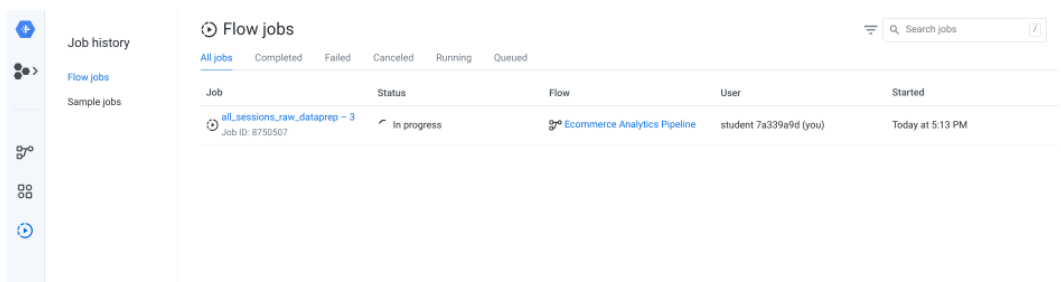

Após a conclusão do job do Cloud Dataprep, atualize a página do BigQuery e confirme se a tabela de saída apparel_revenue existe.

Selecione apparel_revenue > Visualizar e verifique se você tem dados de transações de receita para produtos de vestuário.



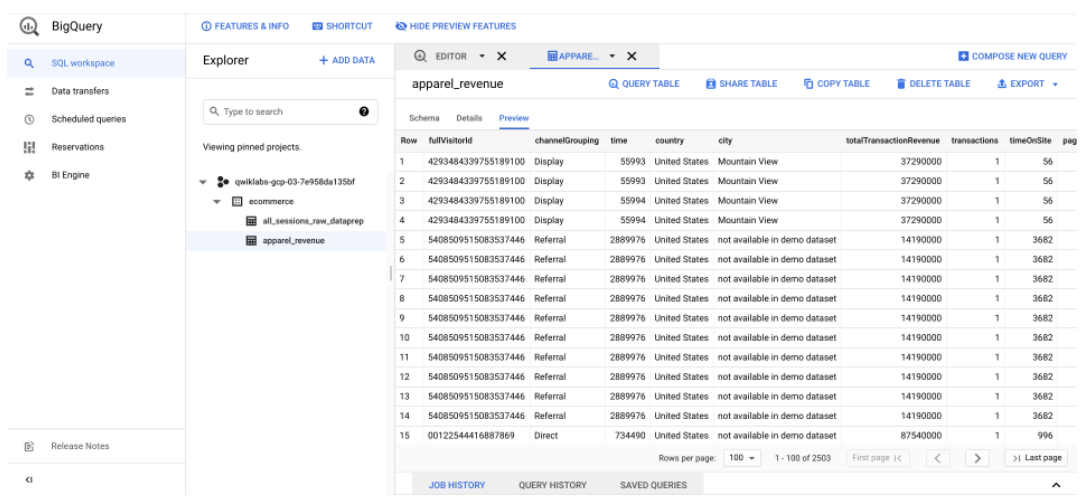